In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from google.colab import drive
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.base import TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 16, 8

In [182]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/training_data.csv"

In [0]:
df = pd.read_csv(path)

In [185]:
df.head()

,X1,X2,X3,y
0,458.7,295.2,477.0,1187.0
1,488.5,326.5,497.0,1149.1
2,588.3,395.4,586.4,1268.3
3,613.3,440.6,606.1,1124.9
4,606.7,420.0,605.8,1194.5


In [186]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 155
Total number of columns in dataset = 4


In [187]:
df.head()

,X1,X2,X3,y
0,458.7,295.2,477.0,1187.0
1,488.5,326.5,497.0,1149.1
2,588.3,395.4,586.4,1268.3
3,613.3,440.6,606.1,1124.9
4,606.7,420.0,605.8,1194.5


In [0]:
target_col = "y"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

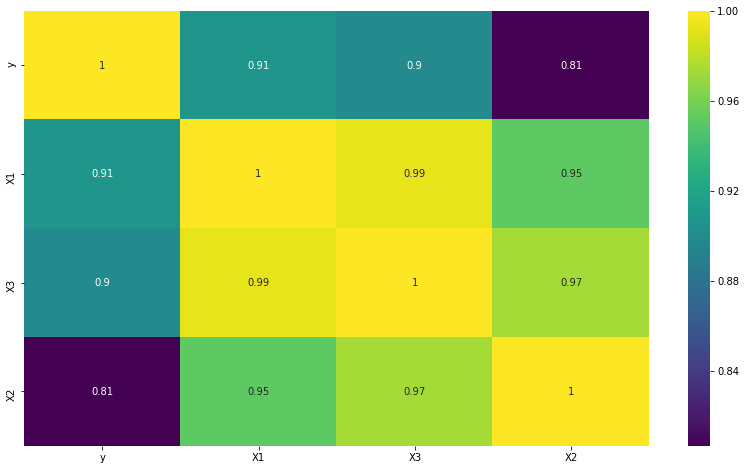

In [189]:
k = 5 #number of variables for heatmap
cols = df.corr().nlargest(k, target_col)[target_col].index
cm = df[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [0]:
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

In [191]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     449.5
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           5.04e-75
Time:                        05:21:17   Log-Likelihood:                -982.84
No. Observations:                 155   AIC:                             1974.
Df Residuals:                     151   BIC:                             1986.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6241     28.503      0.022      0.9

In [0]:
x_line = df["X1"].values.reshape(-1,1)
y_line = df["X2"].values.reshape(-1,1)
z_line = df["X3"].values.reshape(-1,1)

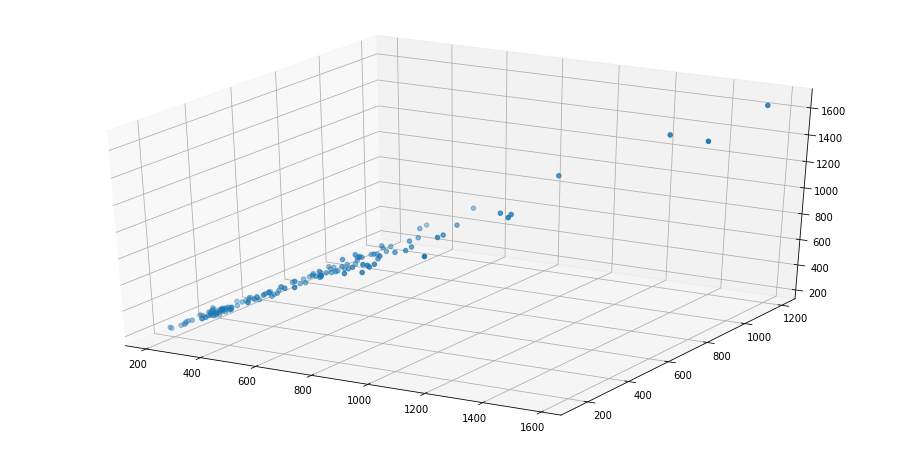

In [193]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x_line, y_line, z_line, 'gray')
plt.show()

In [0]:
def plot_plane_with_points(x,y,z):
    X = np.hstack((x, y))
    X = np.hstack((np.ones((x.shape[0], 1)), X ))
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), z)
    k = int(max(np.max(x), np.max(y), np.max(z))) #size of the plane
    
    p1, p2 = np.mgrid[:k, :k]
    P = np.hstack(( np.reshape(p1, (k*k, 1)), np.reshape(p2, (k*k, 1))))
    P = np.hstack(( np.ones((k*k, 1)), P))
    
    plane = np.reshape(np.dot(P, theta), (k, k));

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x[:, 0], y[:,0], z[:,0],'ro') # scatter plot
    ax.plot_surface(p1,p2,plane) # plane plot

    ax.set_xlabel('x1 label')
    ax.set_ylabel('x2 label')
    ax.set_zlabel('y label')

    return plt.show()

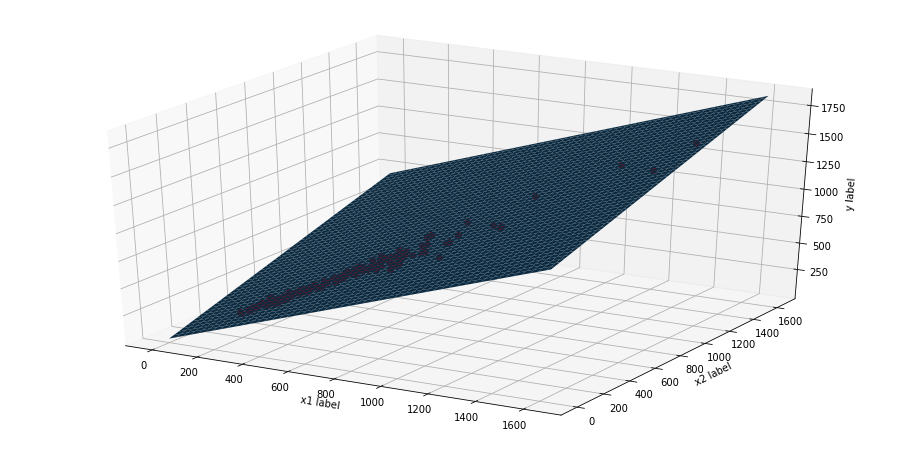

In [195]:
plot_plane_with_points(x_line, y_line, z_line)

In [0]:
X_std = StandardScaler().fit_transform(X)

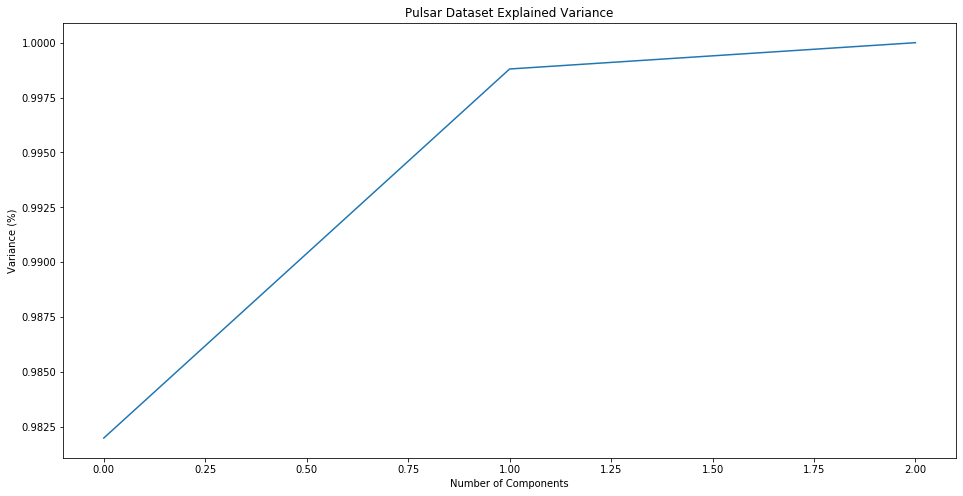

In [197]:
pca = PCA().fit(X_std)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [198]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98198228, 0.99880119, 1.        ])

In [0]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

In [0]:
X_pca_with_constant = sm.add_constant(X_pca)
model = sm.OLS(y, X_pca_with_constant)

In [201]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     521.0
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           3.98e-51
Time:                        05:21:20   Log-Likelihood:                -1045.8
No. Observations:                 155   AIC:                             2096.
Df Residuals:                     153   BIC:                             2102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        924.4174     16.661     55.482      0.0

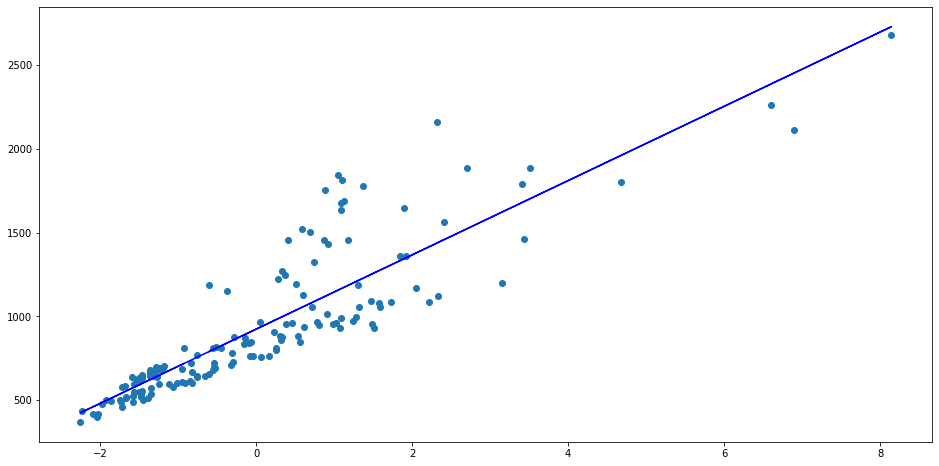

In [202]:
plt.scatter(X_pca, y)
plt.plot(X_pca, results.predict(X_pca_with_constant), color = 'blue')
plt.show()